# DX 601 Week 4 Homework

## Introduction

In this homework, you will practice linear regression and working with random variables.
The data sets of this homework are small, so your code should run in an instant, but you will be able to apply the same techniques to larger data sets.

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for sample code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Instructions

You should replace every instance of "..." below.
These are where you are expected to write code to answer each problem.

After some of the problems, there are extra code cells that will test functions that you wrote so you can quickly see how they run on an example.
If your code works on these examples, it is more likely to be correct.
However, the autograder will test different examples, so working correctly on these examples does not guarantee full credit for the problem.
You may change the example inputs to further test your functions on your own.
You may also add your own example inputs for problems where we did not provide any.

Be sure to run each code block after you edit it to make sure it runs as expected.
When you are done, we strongly recommend you run all the code from scratch (Runtime menu -> Restart and Run all) to make sure your current code works for all problems.

If your code raises an exception when run from scratch, it will  interfere with the auto-grader process causing you to lose some or all points for this homework.
Please ask for help in YellowDig or schedule an appointment with a learning facilitator if you get stuck.


## Problems

## Shared Imports

Do not install or use any additional modules.
Installing additional modules may result in an autograder failure resulting in zero points for some or all problems.

In [1]:
import math
import random

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

### Shared Data

Many of the problems will use this mango data set.
This data set is small and your code should run instantly with it, but you will be able to use the same code and techniques with larger data sets.

In [3]:
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

In [4]:
mango_data

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness,rated_flavor
0,1,5,4,0,4,4,5
1,1,5,5,1,5,5,1
2,2,4,3,1,3,3,3
3,3,3,2,0,2,1,2
4,5,1,1,1,1,1,1
5,4,2,1,1,1,1,1
6,5,1,1,1,2,1,1
7,3,3,2,1,2,2,2


### Problem 1 (3 points)

Build a linear regression for the mango rated flavor column using just the estimated flavor column.
Set `p1` to the prediction of this model when the estimated flavor value is 3.

In [33]:
# YOUR CHANGES HERE
LR1 = sklearn.linear_model.LinearRegression().fit(np.array(mango_data["estimated_flavor"]).reshape(-1, 1), np.array(mango_data["rated_flavor"]).reshape(-1, 1))
p1 = LR1.predict([[3]])

In [32]:
p1

array([[2.21428571]])

### Problem 2 (3 points)

Build a linear regression for the mango rated flavor column using just the yellow rating column.
Set `p2` to the additive constant in the linear equation.

You can look at the videos or code examples to see how to get the additive constant depending how you built the model, or evaluate your model with all zero inputs.

In [93]:
# YOUR CHANGES HERE
LR2 = sklearn.linear_model.LinearRegression().fit(np.array(mango_data["yellow_rating"]).reshape(-1, 1), np.array(mango_data["rated_flavor"]).reshape(-1, 1))
p2 = LR2.intercept_[0]

In [94]:
p2

np.float64(0.33333333333333304)

### Problem 3 (3 points)

Build a linear regression for the mango rated flavor column using just the yellow rating column.
(You can reuse the regression built for problem 2.)
Set `p3` to the coefficient of the yellow rating value in the linear equation.

You can look at the videos or code examples to see how to get coefficient, or you may be able to deduce it with a couple evaluations of the model (e.g. $f(1) - f(0)$).

In [91]:
# YOUR CHANGES HERE
LR3 = sklearn.linear_model.LinearRegression().fit(np.array(mango_data["yellow_rating"]).reshape(-1, 1), np.array(mango_data["rated_flavor"]).reshape(-1, 1))
p3 = LR3.coef_[0][0]

In [92]:
p3

np.float64(0.5555555555555557)

### Problem 4 (3 points)

Set `p4` to the mean row of the mango data set.
That is, `p4` should be a single row of data with the same columns, where each value is the mean of the corresponding column in the mango data set.

In [39]:
# YOUR CHANGES HERE

p4 = mango_data.mean()

In [40]:
p4

green_rating           3.000
yellow_rating          3.000
softness               2.375
wrinkles               0.750
estimated_flavor       2.500
estimated_sweetness    2.250
rated_flavor           2.000
dtype: float64

### Problem 5 (3 points)

The variable `q5` contains the rated flavor column of the mango data set, so each row of `q5` represents the rated flavor of one sample.
Set `p5` to be a Python dictionary mapping rated flavors to their sample probabilities using `q5`.

`p5` should be a dictionary with integer keys and probability values.

In [42]:
q5 = mango_data["rated_flavor"]
q5

0    5
1    1
2    3
3    2
4    1
5    1
6    1
7    2
Name: rated_flavor, dtype: int64

In [58]:
# YOUR CHANGES HERE
counts = q5.value_counts()
p5 = {x : (counts[x] / len(q5)) for x in set(q5)}

In [59]:
p5

{1: np.float64(0.5),
 2: np.float64(0.25),
 3: np.float64(0.125),
 5: np.float64(0.125)}

In [ ]:
# the sum of probabilities should add up to one
sum(p5.values())

### Problem 6 (4 points)

The variable `q6` below has data for a probability distribution.
The keys of `q6` are integer ratings from 1 to 5 and the values are the probabilities of each rating.
Set `p6` to the average rating based on `q6`.

In [61]:
q6 = {1 : 0.11, 2: 0.18, 3: 0.35, 4: 0.24, 5: 0.12}

In [65]:
# YOUR CHANGES HERE
p6 = sum([x * q6[x] for x in q6.keys()])

In [66]:
p6

3.0799999999999996

### Problem 7 (4 points)

The variable `q7` below has data for a probability distribution.
The keys of `q7` are supposed to be ratings from 1 to 5 and the values are supposed to be the probabilities of each rating.
However, the data for the rating of 5 is missing.
Set `p7` to be the probability of rating 5 assuming that the probabilities for 1 to 4 are correct.

In [68]:
q7 = {1: 0.32, 2: 0.22, 3: 0.12, 4: 0.1}

In [69]:
# YOUR CHANGES HERE

p7 = 1 - sum(q7.values())

In [70]:
p7

0.24

### Problem 8 (4 points)

The variable `q8` below has data for a probability distribution.
The keys of `q8` are integer ratings from 1 to 5 and the values are the probabilities of each rating.
Set `p8` to the rating that has the highest probability according to `q8`.

In [71]:
q8 = {1: 0.11, 2: 0.22, 3: 0.38, 4: 0.01, 5: 0.28}

In [73]:
# YOUR CHANGES HERE
keys = list(q8.keys())
values = list(q8.values())
p8 = keys[values.index(max(values))]

In [74]:
p8

3

### Problem 9 (4 points)

Large language models work by repeatedly sampling tokens, small chunks of text, based on the preceding tokens in the text.
This works by analyzing the preceding tokens, estimating a probability distribution over choices for the next token, and then sampling that probability distribution to pick a token.
Perplexity is one measure used to evaluate the performance of large language models.

The variable `q9` contains a probability distribution of tokens.
Set `p9` to be the perplexity of `q9`.

In [97]:
# First tokens from repeatedly prompting ChatGPT with
# "Tell me something interesting in 10 words or less."
q9_raw = [
    "Honey",
    "Octopuses",
    "Sharks",
    "Bananas",
    "A ",
    "Wombat",
    "A ",
    "Bees",
    "The ",
    "There's",
    "Cleopatra",
    "Venus ",
    "Hot ",
    "Humans ",
    "A "]

q9 = {}
for t in q9_raw:
    q9[t] = q9.get(t, 0) + 1 / len(q9_raw)

q9

{'Honey': 0.06666666666666667,
 'Octopuses': 0.06666666666666667,
 'Sharks': 0.06666666666666667,
 'Bananas': 0.06666666666666667,
 'A ': 0.2,
 'Wombat': 0.06666666666666667,
 'Bees': 0.06666666666666667,
 'The ': 0.06666666666666667,
 "There's": 0.06666666666666667,
 'Cleopatra': 0.06666666666666667,
 'Venus ': 0.06666666666666667,
 'Hot ': 0.06666666666666667,
 'Humans ': 0.06666666666666667}

In [105]:
# YOUR CHANGES HERE

p9 = 2 ** (-1 * sum([x * math.log(x, 2) for x in q9.values()]))

In [106]:
p9

12.041123426403464

### Problem 10 (4 points)

The variable `q10` has a probability where the keys are different events and the values are the probabilities of those events.
Set `p10` to be the entropy of that probability distribution using base 2 for the logarithm.

In [100]:
q10 = {
    "robot uprising": 0.2,
    "politician uprising": 0.1,
    "it rains but only on Boston": 0.3,
    "the class votes for ghost peppers": 0.01,
    "a pretty normal day": 0.39,
}

In [103]:
# YOUR CHANGES HERE

p10 = -1 * sum([x * math.log(x, 2) for x in q10.values()])

In [104]:
p10

1.9139037172696836

### Problem 11 (4 points)

Build a linear regression for the mango rated flavor column using all the other columns as inputs.
Set `p11` to the column with the highest positive coefficient.
(`p11` should be a string with the name of the column.)

In [107]:
mango_inputs = mango_data.drop("rated_flavor", axis=1)
mango_inputs

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness
0,1,5,4,0,4,4
1,1,5,5,1,5,5
2,2,4,3,1,3,3
3,3,3,2,0,2,1
4,5,1,1,1,1,1
5,4,2,1,1,1,1
6,5,1,1,1,2,1
7,3,3,2,1,2,2


In [128]:
# YOUR CHANGES HERE
LR11 = sklearn.linear_model.LinearRegression().fit(np.array(mango_inputs), np.array(mango_data["rated_flavor"]).reshape(-1, 1))
p11 = mango_inputs.columns[list(LR11.coef_[0]).index(max(LR11.coef_[0]))]

In [129]:
p11

'estimated_sweetness'

### Problem 12 (4 points)

Build a linear regression for the mango rated flavor column using all the other columns as inputs.
(You can reuse the regression built for problem 11.)
Set `p12` to be the output of this model for the mean row of the data set (see problem 4).

In [133]:
# YOUR CHANGES HERE
LR12 = sklearn.linear_model.LinearRegression().fit(np.array(mango_inputs), np.array(mango_data["rated_flavor"]).reshape(-1, 1))
p12 = LR12.predict([mango_inputs.mean()])[0][0]

In [134]:
p12

np.float64(2.0)

### Problem 13 (4 points)

The variable `q13` has a list of sample values.
Set `p13` to the highest sample probability of one of those sample values.
That is, if you computed the sample probabilities from `q13`, what would the highest sample probability be?


In [135]:
# words chosen by repeatedly prompting ChatGPT with
# "Pick a common three letter word."
q13 = [
    "Cat",
    "Sun",
    "Box",
    "Dog",
    "Car",
    "Sky",
    "Dog",
    "Pen",
    "Hat",
    "Air",
    "Fan",
    "Run",
    "Tea",
    "Box",
    "Bus",
    "Joy",
    "Key",
    "Bed",
    "Dog",
    "Hat"
]

In [137]:
# YOUR CHANGES HERE
prob_dist = {}
for t in q13:
    prob_dist[t] = prob_dist.get(t, 0) + 1 / len(q13)
p13 = max(prob_dist.values())

In [138]:
p13

0.15000000000000002

### Problem 14 (4 points)

Write a function `p14` that returns the string "You win!" 1% of the time and "Sorry" the rest of the time.

In [141]:
# YOUR CHANGES HERE

def p14():
    if random.choice(range(100)) == 0:
        return "You win!"
    else:
        return "Sorry"

In [155]:
[p14() for _ in range(10)]

['Sorry',
 'You win!',
 'Sorry',
 'Sorry',
 'Sorry',
 'Sorry',
 'Sorry',
 'Sorry',
 'Sorry',
 'Sorry']

### Problem 15 (4 points)

Given the data set in `q15`, write a function `p15` to return bootstrap samples.

A bootstrap sample has the same number of samples as the source data set, but each sample in the bootstrap sample is chosen independently at random from the source data set.

In [176]:
# DO NOT CHANGE

q15 = [0.44526842059338856, 0.6415977178857716, 0.9143457208633793, 0.040810075507440646, 0.6910270489830476, 0.10835956174140715, 0.5831891761086495, 0.24071332159738457, 0.2276135670886662, 0.0187843711518334]

In [180]:
# YOUR CHANGES HERE

def p15():
    return [random.choice(q15) for _ in range(len(q15))]

In [181]:
[p15() for _ in range(10)]

[[0.040810075507440646,
  0.24071332159738457,
  0.5831891761086495,
  0.5831891761086495,
  0.040810075507440646,
  0.6415977178857716,
  0.24071332159738457,
  0.2276135670886662,
  0.44526842059338856,
  0.10835956174140715],
 [0.44526842059338856,
  0.9143457208633793,
  0.6415977178857716,
  0.44526842059338856,
  0.040810075507440646,
  0.5831891761086495,
  0.040810075507440646,
  0.5831891761086495,
  0.0187843711518334,
  0.6910270489830476],
 [0.2276135670886662,
  0.6910270489830476,
  0.24071332159738457,
  0.5831891761086495,
  0.5831891761086495,
  0.9143457208633793,
  0.2276135670886662,
  0.6415977178857716,
  0.6415977178857716,
  0.2276135670886662],
 [0.10835956174140715,
  0.9143457208633793,
  0.44526842059338856,
  0.5831891761086495,
  0.10835956174140715,
  0.0187843711518334,
  0.040810075507440646,
  0.24071332159738457,
  0.10835956174140715,
  0.5831891761086495],
 [0.9143457208633793,
  0.2276135670886662,
  0.10835956174140715,
  0.040810075507440646,
  0

### Problem 16 (4 points)

Write a function `p16` that returns a random row of `q16a` with 70% probability and a random row of `q16b` with 30% probability.

In [163]:
# DO NOT CHANGE

q16a = [1, 3, 5, 7, 11, 13, 17, 19]

In [164]:
# DO NOT CHANGE

q16b = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [165]:
# YOUR CHANGES HERE

def p16():
    if random.choice(range(10)) < 7:
        return random.choice(q16a)
    else:
        return random.choice(q16b)

In [172]:
[p16() for _ in range(10)]

[32, 19, 512, 1, 512, 3, 512, 1, 4, 7]

### Problem 17 (4 points)

Read the following function `q17`.
Set `p17` to be the probability that it returns 5.


In [ ]:
# DO NOT CHANGE

def q17():
    if random.random() < 0.3:
        return 3
    else:
        return 5

In [ ]:
# YOUR CHANGES HERE

p17 = 0.7

In [ ]:
p17

### Problem 18 (4 points)

Read the following function `q18`.
Set `p18` to the variance of the output of `q18`. The function `q18` only returns one value, but can be called repeatedly yielding a distribution.

In [173]:
# DO NOT CHANGE

q18_raw = [
    1,
    1,
    1,
    2,
    2,
    2,
    3,
    3,
    3,
    3,
    3,
    3,
    4,
    5,
    5,
    5,
    6,
    6,
    6,
    6
]

In [174]:
# DO NOT CHANGE

def q18():
    return random.choice(q18_raw)

In [188]:
# YOUR CHANGES HERE
prob_dist = {}
for t in q18_raw:
    prob_dist[t] = prob_dist.get(t, 0) + 1 / len(q18_raw)
expValue = sum(q18_raw) / len(q18_raw)
p18 = sum([((x - expValue) ** 2) * prob_dist[x] for x in set(q18_raw)])

In [189]:
p18

2.95

### Problem 19 (4 points)

Write a function `p19` that returns the strings "cat", "dog", "cow", "tiger" or "horse" with equal probability.

In [182]:
# YOUR CHANGES HERE

def p19():
    return random.choice(["cat", "dog", "cow", "tiger", "horse"])

In [183]:
[p19() for _ in range(10)]

['cow',
 'horse',
 'cat',
 'dog',
 'cow',
 'tiger',
 'cow',
 'horse',
 'tiger',
 'horse']

### Problem 20 (4 points)

Perform a linear regression with inputs `q20x` and target outputs `q20y`.
Using that model, make a scatter plot showing the model performance on the training data using the model predictions for the x axis and the target outputs for the y axis.
Set `p20` to be the output of the matplotlib command.

In [191]:
# DO NOT CHANGE

q20x = np.array([[0.2, 0.3],
                 [0.4, 0.3],
                 [0.3, 0.4],
                 [0.35, 0.45],
                 [0.6, 0.4],
                 [0.3, 0.9],
                 [0.13, 0.99],
                 [0.8, 0.5],
                 [0.9, 0.92],
                 [0.98, 0.95]])

q20y = np.array([0.2, 0.3, 0.4, 0.3, 0.5, 0.6, 0.5, 0.8, 0.9, 0.1])

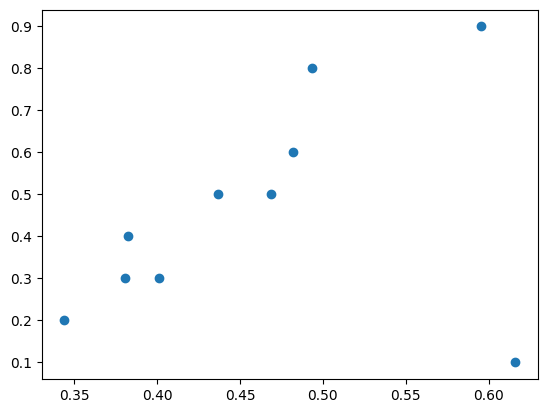

In [199]:
# YOUR CHANGES HERE
LR20 = sklearn.linear_model.LinearRegression().fit(np.array(q20x), np.array(q20y))
model_predictions = [LR20.predict(q20x)]

p20 = plt.scatter(model_predictions[0], q20y)